In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def create_dataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [4]:
train_paths, train_labels = create_dataframe(TRAIN_DIR)
train_df = pd.DataFrame({'image': train_paths, 'label': train_labels})
test_paths, test_labels = create_dataframe(TEST_DIR)
test_df = pd.DataFrame({'image': test_paths, 'label': test_labels})

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
        img_array = img_to_array(img)
        features.append(img_array)
    features = np.array(features)
    return features

In [6]:
x_train = extract_features(train_df['image']) / 255.0
x_test = extract_features(test_df['image']) / 255.0

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(train_df['label']))
y_test = to_categorical(label_encoder.transform(test_df['label']))

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.8235 - loss: 0.4841 - val_accuracy: 0.6196 - val_loss: 1.2328
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.8255 - loss: 0.4743 - val_accuracy: 0.6226 - val_loss: 1.2417
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.8212 - loss: 0.4851 - val_accuracy: 0.6219 - val_loss: 1.2434
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.8244 - loss: 0.4714 - val_accuracy: 0.6209 - val_loss: 1.2423
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.8263 - loss: 0.4785 - val_accuracy: 0.6175 - val_loss: 1.2562
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.8289 - loss: 0.4685 - val_accuracy: 0.6187 - val_loss: 1.2205
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.8294 - loss: 0.4647 - val_accuracy: 0.6199 - val_loss: 1.2546
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.8315 - loss:

In [58]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5796 - loss: 1.4375
Test Loss: 1.2983388900756836
Test Accuracy: 0.6202943921089172


In [19]:
model.save("emotion_detector_model24.h5")

In [20]:
from tensorflow.keras.models import load_model
loaded_model = load_model("emotion_detector_model24.h5")

In [21]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [22]:
# user_image_path = 'images/train/angry/22.jpg'
# predicted_emotion = predict_emotion(loaded_model, user_image_path)
# print("Predicted Emotion:", predicted_emotion)

In [23]:
def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0


In [24]:
image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
model prediction is  happy


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
model prediction is  happy


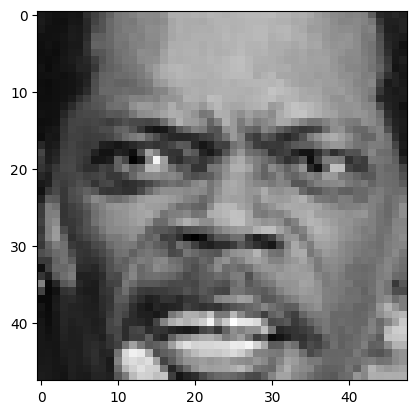

In [26]:
image = 'images/train/angry/10.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
model prediction is  disgust


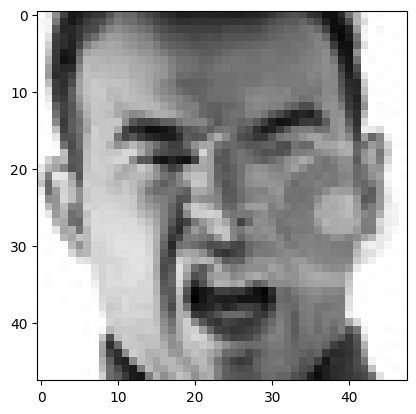

In [20]:
image = 'images/train/disgust/826.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')